# Induced Seismicity

**Fill me in!**

In [ ]:
# Put all scripts that should be loaded here
%load simulate.py

In [10]:
# %load simulate.py
import numpy as np

def dot_normalized(ranks1, ranks2, lag=0, use_zeros=False):
    """
    Shifts `ranks2` forward by `lag` number of entries.
    Removes the tail ends of the rank vectors that fall off
    after shifting. Then returns the dot product normalized
    by the number of entries that were used in the dot.
    For instance, suppose
         ranks1  = [1, 2, 3, 4]
         ranks2  = [4, 3, 2, 1]
         lag     = 2.
    After shifting and removing the fall off, we have
         ranks1' = [3, 4]
         ranks2' = [4, 3]
    The normalized dot is (3 * 4 + 4 * 3) / 2.

    Assumes that len(ranks1) == len(ranks2) and all ranks
    are non-negative.

    Args:
        ranks1    (1D np.array) : Ranks for first dataset
        ranks2    (1D np.array) : Ranks for second dataset
        lag       (int)         : Number of entries to shift
        use_zeros (bool)        : Use zeros in rank vectors
                                  for normalizing
    Returns:
        Normalized dot product after shifting by `lag`
    """
    assert len(ranks1) == len(ranks2), \
           "Rank vectors are not the same length"

    # Count the number of entries that would be zeroed out
    # in either vector
    num_zeros = 0
    if not use_zeros:
        num_zeros = np.sum((ranks1 * ranks2) == 0)

    # Pad rank vectors with zeros (from front w/ ranks1, 
    # from back w/ ranks2); equivalent to shifting
    padded_ranks1 = np.append(ranks1, np.zeros(lag))
    padded_ranks2 = np.insert(ranks2, 0, np.zeros(lag))

    # Normalization constant
    num_valid = float(len(ranks1) - lag - num_zeros)

    return np.dot(padded_ranks1, padded_ranks2) / num_valid

def largest_dot_normalized(ranks1, ranks2, min_lag=0, max_lag=12, use_zeros=False):
    """
    Returns the largest normalized dot product of the two rank vectors
    across all possible lags specified by `min_lag` and `max_lag`. 
    Inclusive of both `min_lag` and `max_lag`.
    """
    dots = [dot_normalized(ranks1, ranks2, lag, use_zeros) \
                for lag in range(min_lag, max_lag + 1)]
    return np.amax(dots)

def simulate(ranks1, ranks2, num_trials=10000, min_lag=0, max_lag=12, use_zeros=False):
    """
    Given two rank vectors, repeatedly permutes ranks and gets 
    the largest normalized dot product. Return all simulated values.
    """
    # Used to simulate a single trial. The input is not used
    def simulate_single_trial(_):
        np.random.shuffle(ranks1)
        return largest_dot_normalized(ranks1, ranks2, min_lag, max_lag, use_zeros)
    
    # Make a copy for ranks1 because np.random.shuffle is in place
    ranks1 = ranks1.copy()

    return np.array(list(map(simulate_single_trial, range(num_trials))))


In [18]:
%%time

a = np.arange(1, 457)
b = np.arange(1, 457)
np.random.shuffle(b)
og_b = b.copy()
allsim = simulate(a, b)

CPU times: user 5.1 s, sys: 25.5 ms, total: 5.12 s
Wall time: 5.15 s


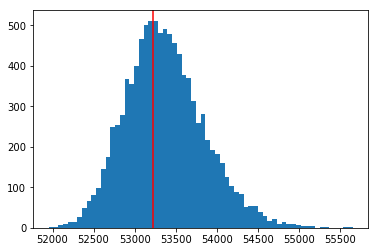

In [27]:
import matplotlib.pyplot as plt

og = largest_dot_normalized(a, b)
plt.hist(allsim, bins = 'auto')
plt.axvline(x = og, color = 'red')
plt.show()

In [21]:
np.dot(a, a) / 456.

69540.166666666672

In [24]:
np.dot(a, np.flip(a, axis=0)) / 456.

34884.333333333336

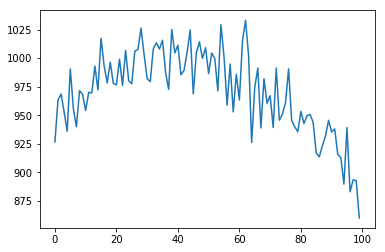

In [48]:
t=np.arange(100)

e1 = np.random.randn(100)

water1 = 1000-0.03*(t-40)**2+20*e1

plt.plot(water1)
plt.show()

def get_eq(water):
    eq = np.array([np.random.poisson(np.exp(np.random.randn(1))*(0.0001+0.0005*water[i])) 
                   for i in range(len(water))])
#     plt.plot(eq)
#     plt.show()
    return eq

eq1=get_eq(water1)

In [42]:
from scipy.stats import rankdata

eq_ranks = rankdata(eq1)
water_ranks = rankdata(water1)

In [45]:
s = simulate(eq_ranks, water_ranks)

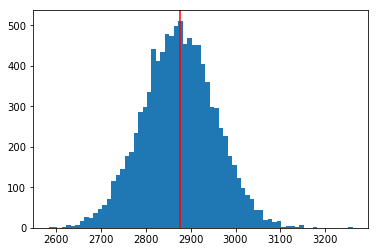

In [46]:
og = largest_dot_normalized(eq_ranks, water_ranks)
plt.hist(s, bins = 'auto')
plt.axvline(x = og, color = 'red')
plt.show()

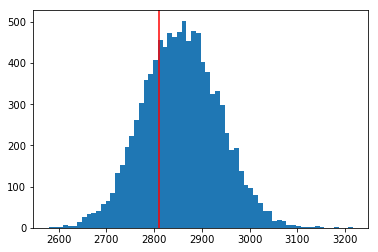

In [57]:
t=np.arange(100)
e1 = np.random.randn(100)
water1 = 1000-0.03*(t-40)**2+20*e1
eq1=get_eq(water1)

eq_ranks = rankdata(eq1)
water_ranks = rankdata(water1)
s = simulate(eq_ranks, water_ranks)
og = largest_dot_normalized(eq_ranks, water_ranks)
plt.hist(s, bins = 'auto')
plt.axvline(x = og, color = 'red')
plt.show()